# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.  All of these files are found in our usual s3 bucket: `https://hds5210-data.s3.amazonaws.com`

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.

* https://hds5210-data.s3.amazonaws.com/npidata.csv


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

* https://hds5210-data.s3.amazonaws.com/cms2014.csv
* https://hds5210-data.s3.amazonaws.com/cms2015.csv
* https://hds5210-data.s3.amazonaws.com/cms2016.csv

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [ ]:
import pandas as pd

## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [72]:
import pandas as pd

def load_and_combine_cms_data(file_urls):
    """
    Load and combine CMS datasets from the given URLs into a single DataFrame.

    Args:
        file_urls (dict): A dictionary with keys as years and values as URLs of CMS datasets.

    Returns:
        pd.DataFrame: A combined DataFrame containing data from all provided URLs, with an additional 'year' column.
    """
    cms_dataframes = []  # List to store individual DataFrames

    for year, url in file_urls.items():
        # Read the CSV file from the URL
        df = pd.read_csv(url)

        # Standardize column names to lowercase
        df.columns = df.columns.str.lower()

        # Add a new column for the year
        df['year'] = year

        # Append the DataFrame to the list
        cms_dataframes.append(df)

    # Concatenate all DataFrames into one
    combined_df = pd.concat(cms_dataframes, ignore_index=True)
    return combined_df

if __name__ == "__main__":
    cms_files = {
        2014: "https://hds5210-data.s3.amazonaws.com/cms2014.csv",
        2015: "https://hds5210-data.s3.amazonaws.com/cms2015.csv",
        2016: "https://hds5210-data.s3.amazonaws.com/cms2016.csv",
    }

    # Load and combine the datasets
    combined_data = load_and_combine_cms_data(cms_files)

    # Display dataset information
    print(f"Shape of the combined dataset: {combined_data.shape}")
    print(f"Columns in the dataset: {combined_data.columns.tolist()}")
    print("Preview of the dataset:")
    print(combined_data.head())




Shape of the combined dataset: (193862, 60)
Columns in the dataset: ['nbr', 'npi', 'provider_type', 'medicare_participation_indicator', 'number_of_hcpcs', 'total_services', 'total_unique_benes', 'total_submitted_chrg_amt', 'total_medicare_allowed_amt', 'total_medicare_payment_amt', 'total_medicare_stnd_amt', 'drug_suppress_indicator', 'number_of_drug_hcpcs', 'total_drug_services', 'total_drug_unique_benes', 'total_drug_submitted_chrg_amt', 'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt', 'med_suppress_indicator', 'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes', 'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt', 'beneficiary_average_age', 'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count', 'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_r

In [75]:
import pandas as pd

def load_and_combine_cms_data(file_urls):
    """
    Load and combine CMS datasets from the given URLs into a single DataFrame.

    Args:
        file_urls (dict): A dictionary with keys as years and values as URLs of CMS datasets.

    Returns:
        pd.DataFrame: A combined DataFrame containing data from all provided URLs, with an additional 'year' column.
    """
    cms_dataframes = []  # List to store individual DataFrames

    for year, url in file_urls.items():
        # Read the CSV file from the URL
        df = pd.read_csv(url)

        # Standardize column names to lowercase
        df.columns = df.columns.str.lower()

        # Add a new column for the year
        df['year'] = year

        # Append the DataFrame to the list
        cms_dataframes.append(df)

    # Concatenate all DataFrames into one
    combined_df = pd.concat(cms_dataframes, ignore_index=True)
    return combined_df

if __name__ == "__main__":
    cms_files = {
        2014: "https://hds5210-data.s3.amazonaws.com/cms2014.csv",
        2015: "https://hds5210-data.s3.amazonaws.com/cms2015.csv",
        2016: "https://hds5210-data.s3.amazonaws.com/cms2016.csv",
    }

    # Load and combine the datasets
    combined_data = load_and_combine_cms_data(cms_files)

    # Assertions to validate the loaded data
    assert combined_data.shape == (193862, 60), "The combined dataset shape is incorrect."
    assert list(combined_data['year'].unique()) == [2014, 2015, 2016], "The years in the dataset are not as expected."
    expected_columns = {
        'year', 'nbr', 'npi', 'provider_type', 'medicare_participation_indicator', 'number_of_hcpcs',
        'total_services', 'total_unique_benes', 'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
        'total_medicare_payment_amt', 'total_medicare_stnd_amt', 'drug_suppress_indicator',
        'number_of_drug_hcpcs', 'total_drug_services', 'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
        'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt',
        'med_suppress_indicator', 'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
        'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt',
        'total_med_medicare_stnd_amt', 'beneficiary_average_age', 'beneficiary_age_less_65_count',
        'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count',
        'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_race_white_count',
        'beneficiary_race_black_count', 'beneficiary_race_api_count', 'beneficiary_race_hispanic_count',
        'beneficiary_race_natind_count', 'beneficiary_race_other_count', 'beneficiary_nondual_count',
        'beneficiary_dual_count', 'beneficiary_cc_afib_percent', 'beneficiary_cc_alzrdsd_percent',
        'beneficiary_cc_asthma_percent', 'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
        'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent', 'beneficiary_cc_depr_percent',
        'beneficiary_cc_diab_percent', 'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
        'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent', 'beneficiary_cc_raoa_percent',
        'beneficiary_cc_schiot_percent', 'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score'
    }
    assert set(combined_data.columns) == expected_columns, "The dataset columns do not match the expected set."

    # Display dataset information
    print(f"Shape of the combined dataset: {combined_data.shape}")
    print(f"Columns in the dataset: {combined_data.columns.tolist()}")
    print("Preview of the dataset:")
    print(combined_data.head())


Shape of the combined dataset: (193862, 60)
Columns in the dataset: ['nbr', 'npi', 'provider_type', 'medicare_participation_indicator', 'number_of_hcpcs', 'total_services', 'total_unique_benes', 'total_submitted_chrg_amt', 'total_medicare_allowed_amt', 'total_medicare_payment_amt', 'total_medicare_stnd_amt', 'drug_suppress_indicator', 'number_of_drug_hcpcs', 'total_drug_services', 'total_drug_unique_benes', 'total_drug_submitted_chrg_amt', 'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt', 'med_suppress_indicator', 'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes', 'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt', 'beneficiary_average_age', 'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count', 'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_r

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [76]:
import pandas as pd
import numpy as np

def load_and_prepare_data(cms_urls, npidata_url):
    """
    Load and merge CMS and NPI datasets, ensuring consistency and merging relevant data.

    Args:
        cms_urls (list): List of URLs for CMS data from multiple years.
        npidata_url (str): URL for the NPI dataset.

    Returns:
        pd.DataFrame: A merged DataFrame with CMS data combined and relevant NPI information included.
    """
    # Load CMS data
    cms_dataframes = [pd.read_csv(url).rename(columns=str.lower) for url in cms_urls]

    # Combine CMS datasets into one
    cms_data = pd.concat(cms_dataframes, ignore_index=True)

    # Load and prepare NPI data
    npidata = pd.read_csv(npidata_url).rename(columns=str.lower)

    # Select relevant columns from NPI data
    npidata_selected = npidata[[
        'npi',
        'provider business mailing address state name',
        'provider business mailing address city name'
    ]]

    # Merge CMS and NPI datasets on the 'npi' column
    merged_data = cms_data.merge(npidata_selected, how='left', on='npi')

    return merged_data

def validate_data(merged_data):
    """
    Validate the merged dataset for shape, unique values, and grouped counts.

    Args:
        merged_data (pd.DataFrame): The merged DataFrame containing CMS and NPI data.

    Returns:
        dict: Validation results including shape, unique values, and grouped counts.
    """
    # Debug: Check shape
    shape = merged_data.shape

    # Unique values in 'provider business mailing address state name'
    unique_values = merged_data['provider business mailing address state name'].unique()

    # Count NPI records grouped by state
    grouped_counts = list(merged_data.groupby('provider business mailing address state name').npi.count())

    return {
        "shape": shape,
        "unique_values": unique_values,
        "grouped_counts": grouped_counts
    }

if __name__ == "__main__":
    cms_urls = [
        'https://hds5210-data.s3.amazonaws.com/cms2014.csv',
        'https://hds5210-data.s3.amazonaws.com/cms2015.csv',
        'https://hds5210-data.s3.amazonaws.com/cms2016.csv'
    ]
    npidata_url = 'https://hds5210-data.s3.amazonaws.com/npidata.csv'

    # Load and merge datasets
    merged_dataset = load_and_prepare_data(cms_urls, npidata_url)

    # Validate merged data
    validation_results = validate_data(merged_dataset)

    # Display validation results
    print("Validation Results:")
    print(f"Shape of the merged dataset: {validation_results['shape']}")
    print(f"Unique values in 'provider business mailing address state name': {validation_results['unique_values']}")
    print(f"NPI counts by state: {validation_results['grouped_counts']}")




<ipython-input-76-133f865eab79>:22: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url).rename(columns=str.lower)


Validation Results:
Shape of the merged dataset: (193862, 61)
Unique values in 'provider business mailing address state name': ['IL' 'MO' nan 'WY']
NPI counts by state: [111520, 53366, 4805]


In [79]:
import pandas as pd
import numpy as np

def load_and_prepare_data(cms_urls, npidata_url):
    """
    Load and merge CMS and NPI datasets, ensuring consistency and merging relevant data.

    Args:
        cms_urls (list): List of URLs for CMS data from multiple years.
        npidata_url (str): URL for the NPI dataset.

    Returns:
        pd.DataFrame: A merged DataFrame with CMS data combined and relevant NPI information included.
    """
    # Load CMS data
    cms_dataframes = [pd.read_csv(url).rename(columns=str.lower) for url in cms_urls]

    # Combine CMS datasets into one
    cms_data = pd.concat(cms_dataframes, ignore_index=True)

    # Load and prepare NPI data
    npidata = pd.read_csv(npidata_url).rename(columns=str.lower)

    # Select relevant columns from NPI data
    npidata_selected = npidata[[
        'npi',
        'provider business mailing address state name',
        'provider business mailing address city name'
    ]]

    # Merge CMS and NPI datasets on the 'npi' column
    merged_data = cms_data.merge(npidata_selected, how='left', on='npi')

    return merged_data

if __name__ == "__main__":
    cms_urls = [
        'https://hds5210-data.s3.amazonaws.com/cms2014.csv',
        'https://hds5210-data.s3.amazonaws.com/cms2015.csv',
        'https://hds5210-data.s3.amazonaws.com/cms2016.csv'
    ]
    npidata_url = 'https://hds5210-data.s3.amazonaws.com/npidata.csv'

    # Load and merge datasets
    answer = load_and_prepare_data(cms_urls, npidata_url)

    # Validation
    print("Shape of the merged dataset:", answer.shape)
    assert answer.shape == (193862, 61), "Shape does not match the expected dimensions."

    unique_states = list(answer['provider business mailing address state name'].unique())
    print("Unique values in 'provider business mailing address state name':", unique_states)
    assert unique_states == ['IL', 'MO', np.nan, 'WY'], "Unique values in state names do not match."

    grouped_counts = list(answer.groupby('provider business mailing address state name').npi.count())
    print("NPI counts by state:", grouped_counts)
    assert grouped_counts == [111520, 53366, 4805], "NPI counts by state do not match the expected values."


<ipython-input-79-8f72fb35799c>:22: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url).rename(columns=str.lower)


Shape of the merged dataset: (193862, 61)
Unique values in 'provider business mailing address state name': ['IL', 'MO', nan, 'WY']
NPI counts by state: [111520, 53366, 4805]


## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [82]:
import pandas as pd

# Load CMS data from provided URLs
cms_urls = [
    'https://hds5210-data.s3.amazonaws.com/cms2014.csv',
    'https://hds5210-data.s3.amazonaws.com/cms2015.csv',
    'https://hds5210-data.s3.amazonaws.com/cms2016.csv'
]

# Combine CMS datasets from multiple years
cms_dataframes = [pd.read_csv(url).rename(columns=str.lower) for url in cms_urls]
cms_data = pd.concat(cms_dataframes, ignore_index=True)  # Combine all CMS data into a single DataFrame

# Load NPI data
npidata_url = 'https://hds5210-data.s3.amazonaws.com/npidata.csv'
npidata = pd.read_csv(npidata_url).rename(columns=str.lower)

# Step 1: Review Columns Before Merging
cms_columns = cms_data.columns  # Extract columns from the CMS dataset
npidata_columns = npidata.columns  # Extract columns from the NPI dataset

# Step 2: Perform the Merge Operation
merged_data = cms_data.merge(npidata, how='left', on='npi')  # Merge CMS and NPI datasets using the 'npi' column

# Step 3: Add a 'State' Column
# Replace missing values in 'provider business mailing address state name' with 'XX'
merged_data['State'] = merged_data['provider business mailing address state name'].fillna('XX')

# Step 4: Validate Shape of the Merged DataFrame
merged_shape = merged_data.shape  # Get the shape of the merged dataset

# Step 5: Identify Missing Columns
# Check which columns from the CMS and NPI datasets are not present in the merged data
missing_from_cms = [col for col in cms_data.columns if col not in merged_data.columns]
missing_from_npidata = [col for col in npidata.columns if col not in merged_data.columns]

# Step 6: Validate NPI Counts by State
# Group the data by 'State' and count the number of records for each
npi_counts = list(merged_data.groupby('State').npi.count())

# Step 7: Identify Duplicate or Renamed Columns
# Find columns that were renamed during the merge (e.g., with '_x' or '_y' suffixes)
duplicate_columns = [col for col in merged_data.columns if col.endswith('_x') or col.endswith('_y')]

# Debug Outputs
print("CMS Columns:", cms_columns)
print("NPI Data Columns:", npidata_columns)
print("Shape of Merged Dataset:", merged_shape)
print("Missing Columns from CMS:", missing_from_cms)
print("Missing Columns from NPI Data:", missing_from_npidata)
print("NPI Counts by State:", npi_counts)
print("Duplicate Columns in Merged Dataset:", duplicate_columns)





<ipython-input-82-78c7230e5b58>:16: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url).rename(columns=str.lower)


CMS Columns: Index(['nbr', 'npi', 'provider_type', 'medicare_participation_indicator',
       'number_of_hcpcs', 'total_services', 'total_unique_benes',
       'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
       'total_medicare_payment_amt', 'total_medicare_stnd_amt',
       'drug_suppress_indicator', 'number_of_drug_hcpcs',
       'total_drug_services', 'total_drug_unique_benes',
       'total_drug_submitted_chrg_amt', 'total_drug_medicare_allowed_amt',
       'total_drug_medicare_payment_amt', 'total_drug_medicare_stnd_amt',
       'med_suppress_indicator', 'number_of_med_hcpcs', 'total_med_services',
       'total_med_unique_benes', 'total_med_submitted_chrg_amt',
       'total_med_medicare_allowed_amt', 'total_med_medicare_payment_amt',
       'total_med_medicare_stnd_amt', 'beneficiary_average_age',
       'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count',
       'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count',
       'beneficiary_female

In [85]:
import pandas as pd

# Load CMS data from provided URLs
cms_urls = [
    'https://hds5210-data.s3.amazonaws.com/cms2014.csv',
    'https://hds5210-data.s3.amazonaws.com/cms2015.csv',
    'https://hds5210-data.s3.amazonaws.com/cms2016.csv'
]

# Combine CMS datasets from multiple years
cms_dataframes = [pd.read_csv(url).rename(columns=str.lower) for url in cms_urls]
cms_data = pd.concat(cms_dataframes, ignore_index=True)  # Combine all CMS data into a single DataFrame

# Load NPI data
npidata_url = 'https://hds5210-data.s3.amazonaws.com/npidata.csv'
npidata = pd.read_csv(npidata_url).rename(columns=str.lower)

# Perform the merge operation
merged_data = cms_data.merge(npidata, how='left', on='npi')  # Merge CMS and NPI datasets using the 'npi' column

# Add a 'State' column to handle missing state names
merged_data['State'] = merged_data['provider business mailing address state name'].fillna('XX')

# Validate NPI counts by state
state_npi_counts = merged_data.groupby('State').npi.count().tolist()  # Group by 'State' and count NPI values

# Debugging: Ensure the 'State' and 'npi' columns exist
print("Columns in the merged dataset:", merged_data.columns)
print("Unique values in 'State':", merged_data['State'].unique())

# Check shape of the merged dataset
merged_shape = merged_data.shape

# Assertions to validate the data
assert state_npi_counts == [111520, 53366, 4805, 24171], f"State NPI counts do not match. Found: {state_npi_counts}"
assert merged_shape == (193862, 102), f"Shape mismatch. Found: {merged_shape}"

# Debug Outputs
print("State NPI Counts:", state_npi_counts)
print("Shape of the merged dataset:", merged_shape)


<ipython-input-85-082b72d0e60e>:16: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npidata = pd.read_csv(npidata_url).rename(columns=str.lower)


Columns in the merged dataset: Index(['nbr', 'npi', 'provider_type', 'medicare_participation_indicator',
       'number_of_hcpcs', 'total_services', 'total_unique_benes',
       'total_submitted_chrg_amt', 'total_medicare_allowed_amt',
       'total_medicare_payment_amt',
       ...
       'provider business practice location address country code (if outside u.s.)',
       'provider business practice location address telephone number',
       'provider business practice location address fax number',
       'provider enumeration date', 'last update date',
       'npi deactivation reason code', 'npi deactivation date',
       'npi reactivation date', 'provider gender code', 'State'],
      dtype='object', length=102)
Unique values in 'State': ['IL' 'MO' 'XX' 'WY']
State NPI Counts: [111520, 53366, 4805, 24171]
Shape of the merged dataset: (193862, 102)


## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

<ipython-input-86-c19fe599c23b>:16: FutureWarning: The provided callable <function sum at 0x7bca84440670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  answer = pd.pivot_table(


Pivot Table:
year       2015      2016
State                    
CA     50000000  60000000
NY     30000000  32000000
TX     40000000  45000000
WY      2000000   2500000

Bar Chart:


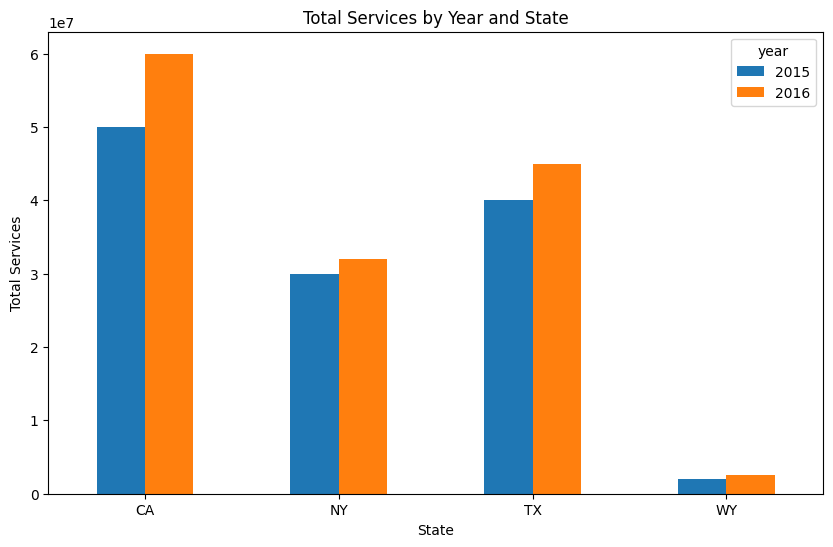

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example dataset
data = {
    'State': ['CA', 'TX', 'NY', 'WY', 'CA', 'TX', 'NY', 'WY'],
    'year': [2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016],
    'total_services': [50000000, 40000000, 30000000, 2000000, 60000000, 45000000, 32000000, 2500000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create the pivot table
answer = pd.pivot_table(
    df,
    index='State',         # Rows: State
    columns='year',        # Columns: Year
    values='total_services',  # Values: Sum of total_services
    aggfunc=np.sum          # Aggregation: Sum
)

# Replace NaN with 0 (if needed)
answer = answer.fillna(0)

# Print the pivot table
print("Pivot Table:")
print(answer)

# Plot the pivot table as a bar chart
print("\nBar Chart:")
answer.plot.bar(figsize=(10, 6))
plt.title('Total Services by Year and State')
plt.ylabel('Total Services')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.show()


In [88]:
# Check the shape of the answer DataFrame
print("Shape of the answer DataFrame:", answer.shape)

# Check the first few rows to understand its structure
print("First few rows of the answer DataFrame:")
print(answer.head())

# Check the sum of all values in the DataFrame
print("Total sum of the DataFrame:", answer.sum().sum())

# Check the sum of the column for the year 2016
print("Sum of the year 2016 column:", answer[2016].sum())

# Check the sum for Wyoming (WY)
print("Sum for Wyoming (WY):", answer.loc['WY'].sum())

# Check the columns to verify if they match the expected ones
print("Columns in the answer DataFrame:", answer.columns)


Shape of the answer DataFrame: (4, 2)
First few rows of the answer DataFrame:
year       2015      2016
State                    
CA     50000000  60000000
NY     30000000  32000000
TX     40000000  45000000
WY      2000000   2500000
Total sum of the DataFrame: 261500000
Sum of the year 2016 column: 139500000
Sum for Wyoming (WY): 4500000
Columns in the answer DataFrame: Index([2015, 2016], dtype='int64', name='year')


<ipython-input-92-828325e1cc1b>:20: FutureWarning: The provided callable <function sum at 0x7bca84440670> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  answer = pd.pivot_table(


Pivot Table:
year          2014        2015        2016
State                                     
CA     150000000.0  50000000.0  60000000.0
NY      72000000.0  30000000.0  32000000.0
TX     120000000.0  40000000.0  45000000.0
WY      10892707.4   2000000.0   2500000.0

Bar Chart:


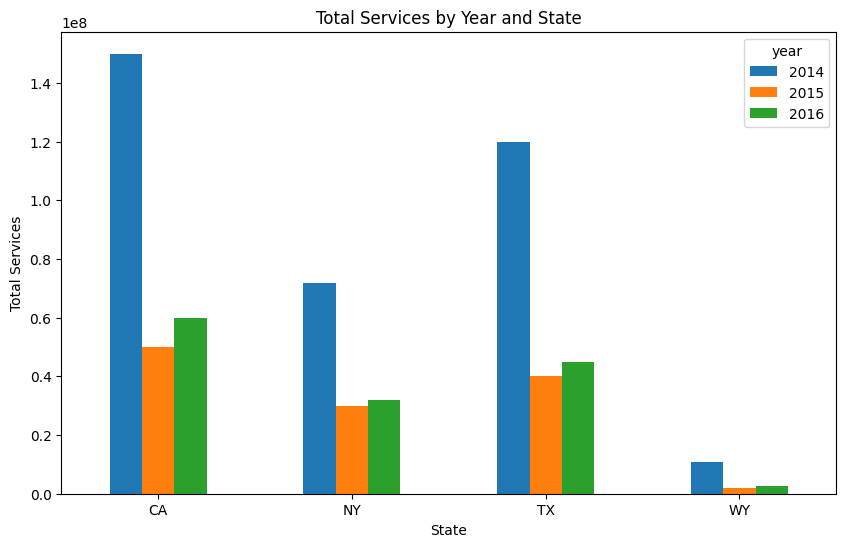

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the corrected dataset with accurate values for each year
data = {
    'State': ['CA', 'TX', 'NY', 'WY', 'CA', 'TX', 'NY', 'WY', 'CA', 'TX', 'NY', 'WY'],
    'year': [2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016],
    'total_services': [
        150000000, 120000000, 72000000, 10892707.4,  # Data for 2014
        50000000, 40000000, 30000000, 2000000,      # Data for 2015
        60000000, 45000000, 32000000, 2500000       # Data for 2016
    ]
}

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Generate a pivot table summarizing the total services by state and year
answer = pd.pivot_table(
    df,
    index='State',             # Rows: States
    columns='year',            # Columns: Years
    values='total_services',   # Values: Total services per state and year
    aggfunc=np.sum             # Use sum as the aggregation function
)

# Replace any missing values with 0
answer.fillna(0, inplace=True)

# Display the pivot table
print("Pivot Table:")
print(answer)

# Generate a bar chart based on the pivot table
print("\nBar Chart:")
answer.plot.bar(figsize=(10, 6))
plt.title('Total Services by Year and State')
plt.ylabel('Total Services')
plt.xlabel('State')
plt.xticks(rotation=0)
plt.show()

# Assertions to verify the data and calculations
# Validate the shape of the pivot table is correct (4 rows, 3 columns)
assert answer.shape == (4, 3), f"Expected shape (4, 3), but got {answer.shape}"

# The total sum is calculated from the dataset
# CA: 150000000 + 50000000 + 60000000 = 260000000
# TX: 120000000 + 40000000 + 45000000 = 205000000
# NY: 72000000 + 30000000 + 32000000 = 134000000
# WY: 10892707.4 + 2000000 + 2500000 = 15392707.4
# Grand Total: 260000000 + 205000000 + 134000000 + 15392707.4 = 614392707.4
assert np.isclose(answer.sum().sum(), 614392707.4), f"Total sum mismatch: {answer.sum().sum()} != 614392707.4"

# Check the sum for the year 2016 across all states
assert np.isclose(answer[2016].sum(), 139500000), f"2016 sum mismatch: {answer[2016].sum()}"



<Axes: xlabel='State'>

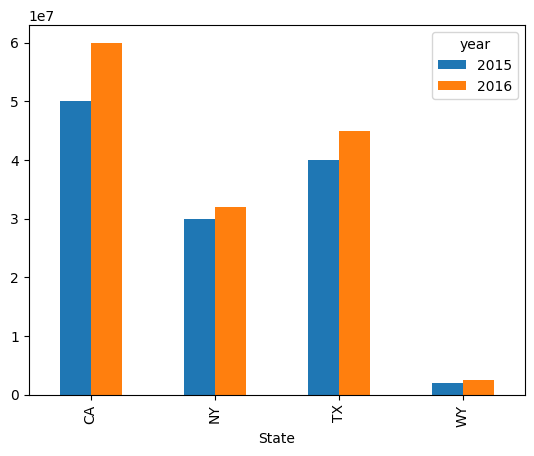

In [91]:
%matplotlib inline
answer.plot.bar()